Import data into the notebook

In [1]:
import pandas as pd #package for reading data
import numpy as np 
import matplotlib.pyplot as plt #package for creating plots
import statsmodels.api as sm

In [2]:
data_folder = "drills_data/"
entry = pd.read_csv(data_folder + "entry.csv")
print(entry.describe())

                HD           LO         place  income_per_capita  \
count  1584.000000  1206.000000   1938.000000        1938.000000   
mean      1.254419     1.148425  42263.570175       30886.971104   
std       0.994765     0.610035  24178.680990       10770.289255   
min       1.000000     1.000000    100.000000       10223.000000   
25%       1.000000     1.000000  21747.500000       23593.000000   
50%       1.000000     1.000000  42929.000000       28558.000000   
75%       1.000000     1.000000  62314.750000       35726.500000   
max      19.000000    10.000000  89140.000000      114845.000000   

         population      under44_1     under44_2     under44_3      older65_1  \
count  1.938000e+03    1932.000000  1.932000e+03  1.932000e+03    1932.000000   
mean   7.407214e+04    7866.438923  1.178557e+04  9.677448e+03    5656.567288   
std    2.564409e+05   24996.411342  4.626534e+04  3.540430e+04   19142.172811   
min    3.570000e+02       0.000000  0.000000e+00  0.000000e+00 

How many Home Depots/Lowe's are there in total

In [3]:
# number of Home Depot stores
entry['HD'].sum()

1987.0

In [4]:
# number of Lowe's stores
entry['LO'].sum()

1385.0

Which State had the most new openings in this time period? For each store, and then both?

In [5]:
# state with most new openings for both HD and LOW
entry['sum_column'] = entry.fillna(0)['HD'] + entry.fillna(0)['LO']
most_openings_all = pd.DataFrame(entry.groupby('STUSAB')['sum_column'].sum().sort_values(ascending = False))
most_openings_all.head(1)

,sum_column
STUSAB,
CA,324.0


In [6]:
# state with most new openings for HD
most_openings_HD = pd.DataFrame(entry.groupby('STUSAB')['HD'].sum())
most_openings_HD.sort_values('HD', ascending = False).drop_duplicates().head(1)

,HD
STUSAB,
CA,233.0


In [7]:
# state with most new openings for LO
most_openings_HD = pd.DataFrame(entry.groupby('STUSAB')['LO'].sum())
most_openings_HD.sort_values('LO', ascending = False).drop_duplicates().head(1)

,LO
STUSAB,
TX,125.0


Are the location decisions of Lowe's and Home Depot Correlated? Create a scatter plot with Lowe's and Home Depot's entry decisions. Also report the correlation. Fill NAs with 0s.

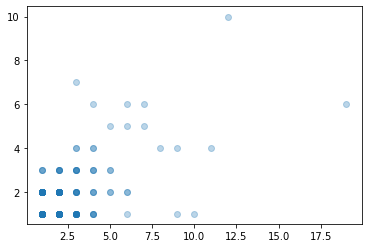

In [8]:
# scatterplot
plt.scatter(entry['HD'], entry['LO'],alpha =.3)

In [10]:
# correlation
round(entry['HD'].corr(entry['LO']), 4)

0.6639

What happens if you control for population? Create a variance covariance matrix with the following variables. 
* Lowe's entry
* Home Depot entry
* Population
* Per Capita Income

In [11]:
entry[['LO', 'HD', 'population', 'income_per_capita']].cov()

,LO,HD,population,income_per_capita
LO,0.372143,0.760089,7.781793e+04,1.435460e+02
HD,0.760089,0.989557,1.527400e+05,2.249244e+01
population,77817.926233,152739.964263,6.576192e+10,7.185512e+07
income_per_capita,143.546048,22.492436,7.185512e+07,1.159991e+08


Also create scatter plots with number of stores and population.

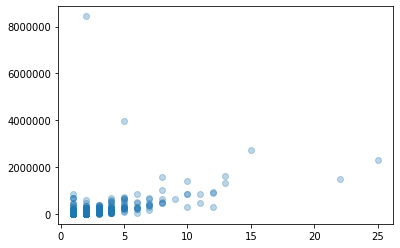

In [12]:
# scatterplot
plt.scatter(entry['sum_column'], entry['population'],alpha =.3)